In [1]:
#Developing a model to predict customer churn for a subscription based service or business.

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

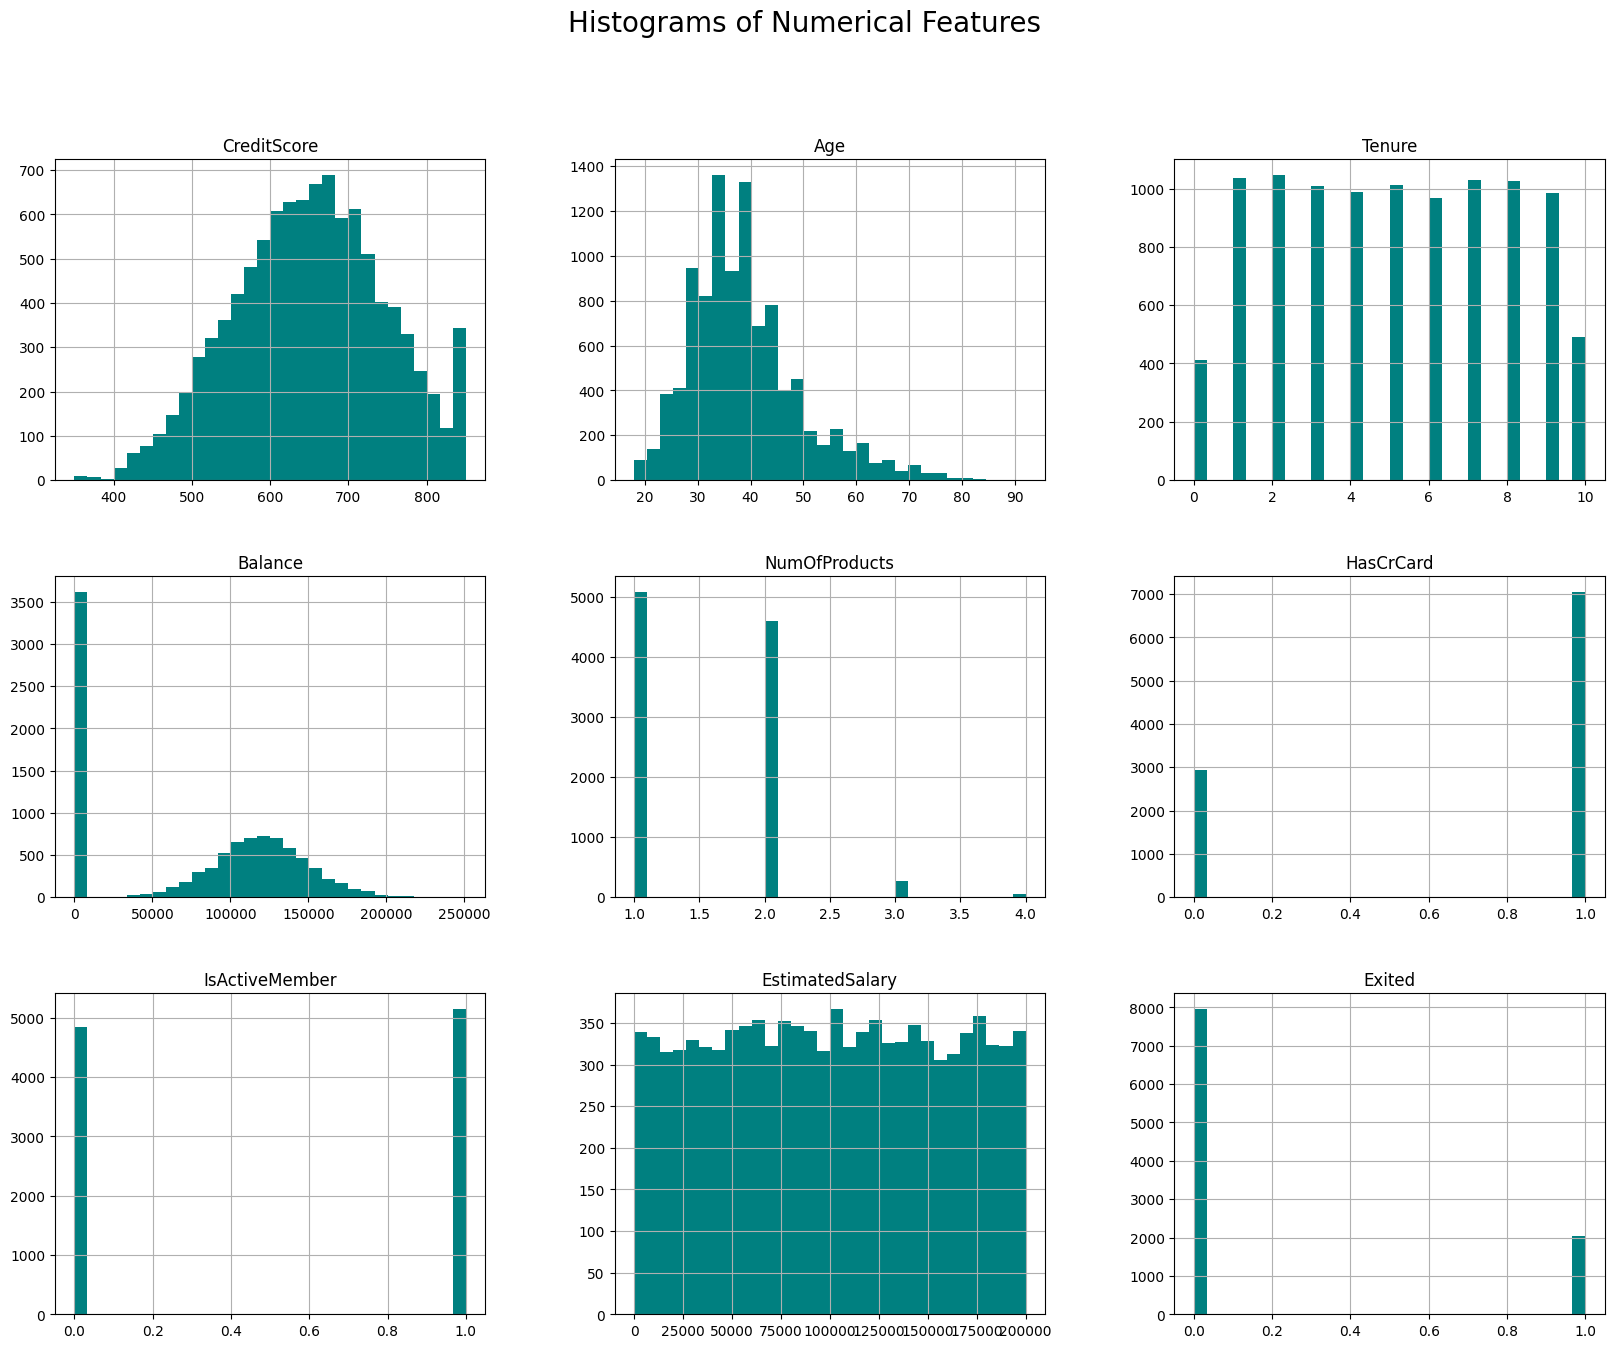

In [9]:
df.hist(bins=30, figsize=(20, 15), color='teal')
plt.suptitle('Histograms of Numerical Features', fontsize=20)
plt.show()

In [10]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'France'

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Geography', hue='Exited')
plt.title('Geography vs Exited', fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Gender vs Exited', fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age Distribution by Exited', fontsize=20)
plt.show()


In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance Distribution by Exited', fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Estimated Salary Distribution by Exited', fontsize=20)
plt.show()

In [ ]:
# Encode categorical variables
labelencoder = LabelEncoder()
df['Geography'] = labelencoder.fit_transform(df['Geography'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])

In [ ]:
# Define features and target variable
X = df.drop(columns=['Exited'])
y = df['Exited']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create a Random Forest Classifier model
model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


In [ ]:
# Make predictions
y_pred = model.predict(X_test)
print(y_pred)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


In [ ]:
import pickle

# Saving the trained model to a file
model_filename = 'churn_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f'Model saved to {model_filename}')


In [ ]:
# Loading the model
with open('churn_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
# Predict on new data
new_data = np.array([[600, 1, 0, 40, 3, 60000.0, 2, 1, 1, 50000.0]])
# Convert the new data to a DataFrame with the same column names as the training data
new_data_df = pd.DataFrame(new_data, columns=['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 
                                              'Balance', 'NumOfProducts', 'HasCrCard', 
                                              'IsActiveMember', 'EstimatedSalary'])

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data_df)

# Make a prediction with the loaded model
prediction = loaded_model.predict(new_data_scaled)

print(f'Prediction: {"Exited" if prediction[0] == 1 else "Not Exited"}')